Project Idea: Predicting Employee Turnover for a Company by Matthew Latondresse

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [73]:
#Creating the Data Frame
df=pd.read_csv("C:/Users/mattl/OneDrive/Documents/GitHub/DSC550/HR_comma_sep.csv")

Problem Statement:
Employee turnover can be a significant challenge for tech startups, impacting productivity, morale, and recruitment efforts. In this project, the goal is to develop a predictive model to identify employees who are at risk of leaving the company.

Target for the Model:
The target variable for the model will be binary, with two classes: "turnover" and "no turnover." The model will predict whether an employee is likely to leave the company within the next six months based on various features and historical data.

Data Source:
Data will be collected from the company's internal HR records, including the following categories:

satisfaction_level: Employee satisfaction level based on surveys.
last_evaluation: The employee's last performance evaluation score.
number_project: The number of projects an employee is currently working on.
average_montly_hours: The average number of hours an employee works per month.
time_spend_company: The number of years the employee has spent at the company.
Work_accident: Binary variable indicating whether the employee has had a workplace accident.
left: Binary variable indicating whether the employee left the company (target variable).
promotion_last_5years: Binary variable indicating whether the employee was promoted in the last 5 years.
sales: The department in which the employee works.
salary: Employee salary level (low, medium, high).

In our first graph we are examining how Satisfaction Levels effect rates of turn over. As evident by the bar graph higher rates of satisfaction lead to lower rates of turn over. This chart has 0 as being people that are still currently working at this company vs 1 being people that have left. 

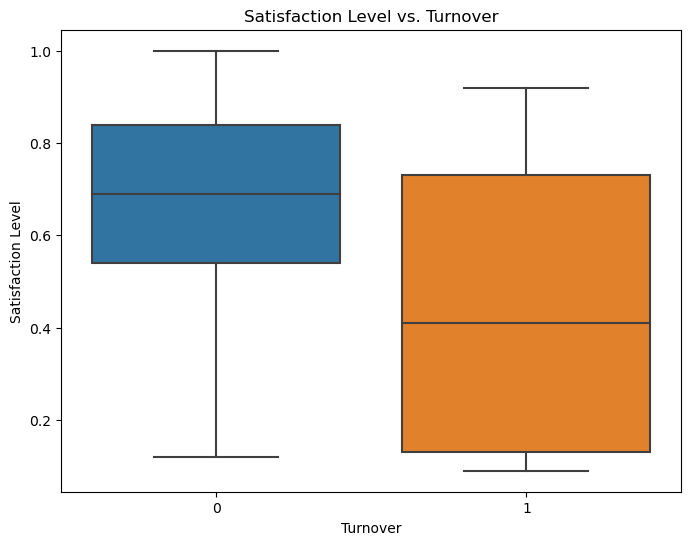

In [74]:
# Graph 1: Satisfaction Level vs. Turnover (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title('Satisfaction Level vs. Turnover')
plt.xlabel('Turnover')
plt.ylabel('Satisfaction Level')
plt.show()


This next graph we are examining how the number of projects may have effected the rate of turnover. As we can see the amount steadily grows in turnover after 4 projects. But the highest amount of turnover is at 2 projects. This seems to indicate that the most employees will leave during their first 2 projects and are less likely to leave until their 6th project onward.

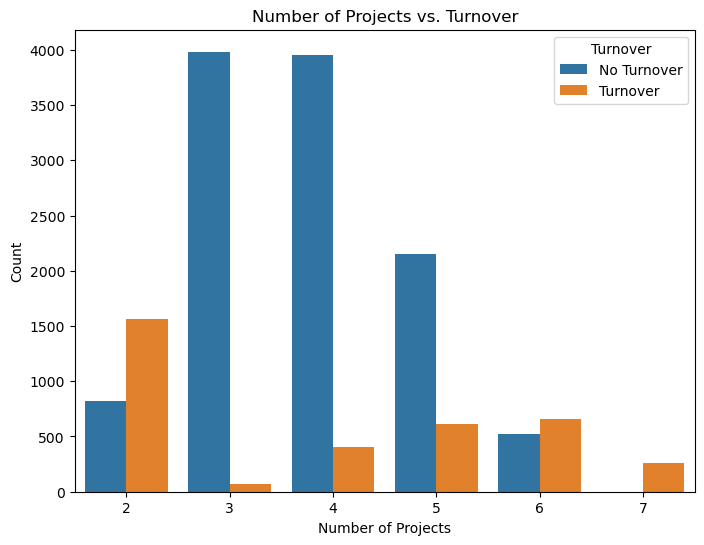

In [75]:
# Graph 2: Number of Projects vs. Turnover (Bar Chart)
plt.figure(figsize=(8, 6))
sns.countplot(x='number_project', hue='left', data=df)
plt.title('Number of Projects vs. Turnover')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.legend(title='Turnover', labels=['No Turnover', 'Turnover'])
plt.show()

Graph 3 examines how Average Monthly Hours effect turnover. This box plot shows that higher average hours is another contributing factor to turn over. Higher average monthly hours seems to increase the likelyhood of an indiviudal leaving.

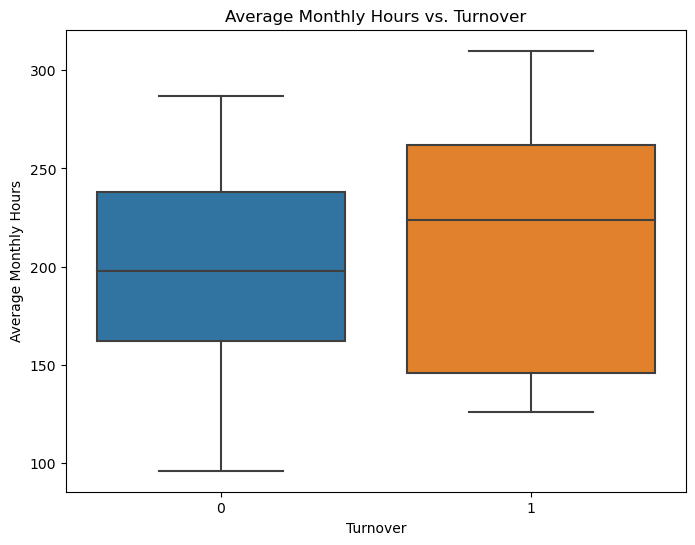

In [76]:
# Graph 3: Average Monthly Hours vs. Turnover (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='left', y='average_montly_hours', data=df)
plt.title('Average Monthly Hours vs. Turnover')
plt.xlabel('Turnover')
plt.ylabel('Average Monthly Hours')
plt.show()

This final graph shows that people are most likely to stay between 3-6 years at this company. But their is a high chance that they leave at the 2-3 year mark.

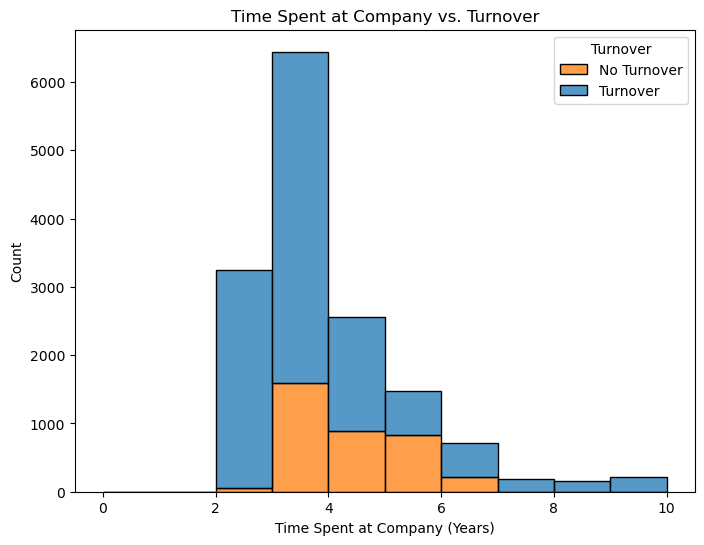

In [77]:
# Graph 4: Time Spent at Company vs. Turnover (Histogram)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='time_spend_company', hue='left', multiple='stack', bins=range(11))
plt.title('Time Spent at Company vs. Turnover')
plt.xlabel('Time Spent at Company (Years)')
plt.ylabel('Count')
plt.legend(title='Turnover', labels=['No Turnover', 'Turnover'])
plt.show()

Milestone 2 Below

Data extraction or selection involves choosing the most relevant features for the analysis. This step is taken to focus on a subset of variables that are likely to have the most significant impact on the prediction task. Selecting only key features simplifies the model and may improve its performance. In the example code, we selected 'satisfaction_level,' 'last_evaluation,' and 'left' as key features for analyzing employee turnover.

In [78]:
# Step 1: Data Extraction/Selection
# Select only the features that you believe are relevant to your analysis
selected_features = ['satisfaction_level', 'last_evaluation', 'left']
df_selected = df[selected_features]
print(df_selected.head())

   satisfaction_level  last_evaluation  left
0                0.38             0.53     1
1                0.80             0.86     1
2                0.11             0.88     1
3                0.72             0.87     1
4                0.37             0.52     1


Feature transformation is used when it's necessary to modify the scale or distribution of a feature. Scaling features ensures that they have similar units, which can be important for some machine learning algorithms. In the example, 'satisfaction_level' is transformed to a [0, 1] scale using min-max scaling, which can help standardize the feature.

In [79]:
# Step 2: Feature Transformation

# Perform the feature transformation
df['satisfaction_level'] = (df['satisfaction_level'] - df['satisfaction_level'].min()) / (df['satisfaction_level'].max() - df['satisfaction_level'].min())

# Calculate summary statistics after the transformation
transformation_stats = df['satisfaction_level'].describe()

# Print the summary statistics after the transformation
print("\nSummary Statistics After Transformation:\n", transformation_stats)


Summary Statistics After Transformation:
 count    14999.000000
mean         0.574542
std          0.273220
min          0.000000
25%          0.384615
50%          0.604396
75%          0.802198
max          1.000000
Name: satisfaction_level, dtype: float64


Feature engineering is the process of creating new features from existing ones to capture valuable information or patterns. In the example, a new feature 'workload' is created by multiplying 'average_monthly_hours' and 'number_project' to represent an employee's workload. This new feature could potentially reveal insights that the original features don't capture on their own.

In [80]:
# Step 3: Feature Engineering
# Create new features that you believe will be valuable for your analysis
df['workload'] = df['average_montly_hours'] * df['number_project']
print(df.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0            0.318681             0.53               2                   157   
1            0.780220             0.86               5                   262   
2            0.021978             0.88               7                   272   
3            0.692308             0.87               5                   223   
4            0.307692             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  workload  
0     low       314  
1  medium      131

When dealing with categorical variables, it's necessary to convert them into a format that machine learning models can work with. Creating dummy variables (one-hot encoding) is a common method. In the example, the 'sales' column is converted into dummy variables to represent different departments within the organization. This allows the model to incorporate categorical information.

In [81]:
# Step 4: Create Dummy Variables
# If you have categorical variables, create dummy variables
df = pd.get_dummies(df, columns=['sales'])
print(df.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0            0.318681             0.53               2                   157   
1            0.780220             0.86               5                   262   
2            0.021978             0.88               7                   272   
3            0.692308             0.87               5                   223   
4            0.307692             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  salary  \
0                   3              0     1                      0     low   
1                   6              0     1                      0  medium   
2                   4              0     1                      0  medium   
3                   5              0     1                      0     low   
4                   3              0     1                      0     low   

   workload  sales_IT  sales_RandD  sales_accounting  sa